###Importing necessary modules & dataset

In [172]:
#importing necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [173]:
#connecting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [174]:
#\t stands for tab
print("Hello\tPython")

Hello	Python


In [175]:
#\x stands for unicodeescape; if we use r before normal string then it becomes raw string
print(r"Hello\xPython")

Hello\xPython


In [176]:
#importing dataset
train_data = pd.read_excel("/content/drive/MyDrive/data/Data_Train.xlsx")

In [177]:
#get glimpse of imported data
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [178]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [179]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [180]:
#show shape of the data
train_data.shape

(10683, 11)

###Data Preprocessing

In [181]:
#missing value exploration
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [182]:
#Let's see 'Total_Stops' missing value row
train_data[train_data['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [183]:
#droping missing value containing row(As missing values are very few)
train_data.dropna(inplace=True)

In [184]:
#observe data again to see if missing values have gone or not
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [185]:
data = train_data.copy()

In [186]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [187]:
#showing data type of each column
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [188]:
#changing datatype of Date_of_Journey,Dep_Time,Arrival_Time from object to date & time
def change_into_datetime(col):
  data[col] = pd.to_datetime(data[col])

In [189]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [190]:
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
  change_into_datetime(feature)

In [191]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [192]:
data['Date_of_Journey'].min()

Timestamp('2019-01-03 00:00:00')

In [193]:
data['Date_of_Journey'].max()

Timestamp('2019-12-06 00:00:00')

In [194]:
data['journey_day'] = data['Date_of_Journey'].dt.day
data['journey_month'] = data['Date_of_Journey'].dt.month
data['journey_year'] = data['Date_of_Journey'].dt.year

In [195]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2022-05-22 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-05-22 05:50:00,2022-05-22 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2022-05-22 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2022-05-22 18:05:00,2022-05-22 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2022-05-22 16:50:00,2022-05-22 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


####Data Cleaning and Featurization

In [196]:
data.drop('Date_of_Journey',axis=1,inplace=True)

In [197]:
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-05-22 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-05-22 05:50:00,2022-05-22 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2022-05-22 09:25:00,2022-06-10 04:25:00,19h,2 stops,No info,13882,6,9,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2022-05-22 18:05:00,2022-05-22 23:30:00,5h 25m,1 stop,No info,6218,5,12,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2022-05-22 16:50:00,2022-05-22 21:35:00,4h 45m,1 stop,No info,13302,3,1,2019


In [198]:
#Extract hour and minute from departure time
def extract_hour_minute(df,col):
  df[col+"_hour"] = df[col].dt.hour
  df[col+"_minutes"] = df[col].dt.minute
  df.drop(col,axis=1,inplace=True)
  return df.head(2)

In [199]:
extract_hour_minute(data,'Dep_Time')

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-05-22 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,5,50


In [200]:
extract_hour_minute(data,'Arrival_Time')

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15


####Let's perform Data Analysis

In [201]:
#Let's Analyze when will most of the flights will take off
def flight_dep_time(x):
  if (x>4) and (x<=8):
    return 'Early Morning'
  elif (x>8) and (x<=12):
    return 'Morning'
  elif (x>12) and (x<=16):
    return 'Noon'
  elif (x>16) and (x<=20):
    return 'Evening'
  elif (x>20) and (x<=24):
    return 'Night'
  else:
    return 'Late Night'

In [202]:
data['Dep_Time_hour'].apply(flight_dep_time)

0                Night
1        Early Morning
2              Morning
3              Evening
4                 Noon
             ...      
10678          Evening
10679          Evening
10680    Early Morning
10681          Morning
10682          Morning
Name: Dep_Time_hour, Length: 10682, dtype: object

In [203]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts()

Early Morning    2880
Evening          2357
Morning          2209
Noon             1731
Night            1040
Late Night        465
Name: Dep_Time_hour, dtype: int64

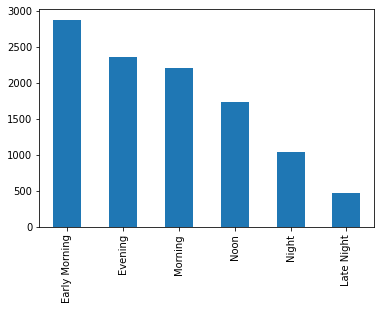

In [204]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

In [205]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

In [206]:
cf.go_offline()

In [207]:
data['Dep_Time_hour'].apply(flight_dep_time).value_counts().iplot(kind='bar')

####Perform Preprocessing on duration Feature

In [208]:
data.head(10)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,2019,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35
5,SpiceJet,Kolkata,Banglore,CCU → BLR,2h 25m,non-stop,No info,3873,24,6,2019,9,0,11,25
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,18,55,10,25
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,2019,8,0,5,5
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,2019,8,55,10,25
9,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,7h 50m,1 stop,No info,8625,27,5,2019,11,25,19,15


In [209]:
def preprocess_duration(x):
  if 'h' not in x:
    x = '0h'+' '+x
  elif 'm' not in x:
    x = x +' '+'0m'
  return x

In [210]:
data['Duration']=data['Duration'].apply(preprocess_duration)

In [211]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [212]:
data['Duration'][0]

'2h 50m'

In [213]:
data['Duration'][0].split(' ')

['2h', '50m']

In [214]:
data['Duration'][0].split(' ')[0]

'2h'

In [215]:
data['Duration'][0].split(' ')[0][0:-1]

'2'

In [216]:
int(data['Duration'][0].split(' ')[0][0:-1])

2

In [217]:
data['Duration'][0].split(' ')[1]

'50m'

In [218]:
data['Duration'][0].split(' ')[1][0:-1]

'50'

In [219]:
int(data['Duration'][0].split(' ')[1][0:-1])

50

In [220]:
data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration, Length: 10682, dtype: int64

In [221]:
data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration, Length: 10682, dtype: int64

In [222]:
data['Duration_hours']=data['Duration'].apply(lambda x: int(x.split(' ')[0][0:-1]))

In [223]:
data['Duration_mins']=data['Duration'].apply(lambda x: int(x.split(' ')[1][0:-1]))

In [224]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,2019,16,50,21,35,4,45


####Lets see whether duration has impact on price or not

In [225]:
data['Duration_total_mins'] = data['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [226]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445


In [227]:
eval('2*60+50*1')

170

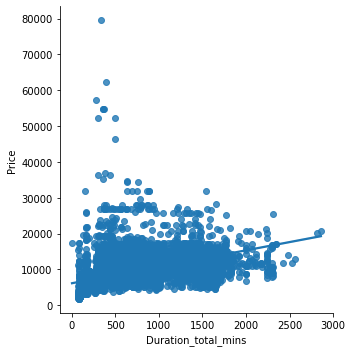

In [228]:
sns.lmplot(x='Duration_total_mins',y='Price',data=data)

In [229]:
#From the above plot it is clear that if duration increases then price also increase.

In [230]:
data['Duration'].unique()

array(['2h 50m', '7h 25m', '19h 0m', '5h 25m', '4h 45m', '2h 25m',
       '15h 30m', '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m',
       '2h 15m', '12h 10m', '26h 35m', '4h 30m', '22h 35m', '23h 0m',
       '20h 35m', '5h 10m', '15h 20m', '2h 55m', '13h 20m', '15h 10m',
       '5h 45m', '5h 55m', '13h 25m', '22h 0m', '5h 30m', '10h 25m',
       '5h 15m', '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m',
       '22h 5m', '2h 45m', '12h 0m', '16h 5m', '19h 55m', '3h 15m',
       '25h 20m', '3h 0m', '16h 15m', '15h 5m', '6h 30m', '25h 5m',
       '12h 25m', '27h 20m', '10h 15m', '10h 30m', '1h 30m', '1h 25m',
       '26h 30m', '7h 20m', '13h 30m', '5h 0m', '19h 5m', '14h 50m',
       '2h 40m', '22h 10m', '9h 35m', '10h 0m', '21h 20m', '18h 45m',
       '12h 20m', '18h 0m', '9h 15m', '17h 30m', '16h 35m', '12h 15m',
       '7h 30m', '24h 0m', '8h 55m', '7h 10m', '14h 30m', '30h 20m',
       '15h 0m', '12h 45m', '10h 10m', '15h 25m', '14h 5m', '20h 15m',
       '23h 10m', '18h 10m',

In [231]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [232]:
data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

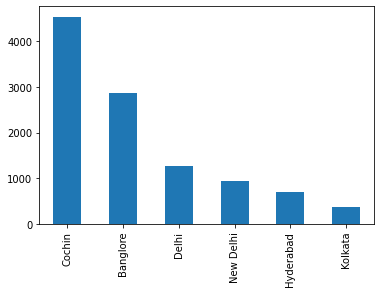

In [233]:
data['Destination'].value_counts().plot(kind='bar')

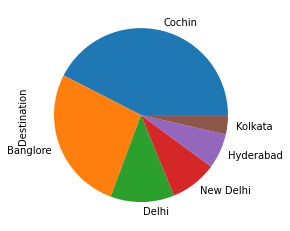

In [234]:
data['Destination'].value_counts().plot(kind='pie')

####On which route Jet airways is extremely used?

In [235]:
data['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [236]:
data['Airline']

0             IndiGo
1          Air India
2        Jet Airways
3             IndiGo
4             IndiGo
            ...     
10678       Air Asia
10679      Air India
10680    Jet Airways
10681        Vistara
10682      Air India
Name: Airline, Length: 10682, dtype: object

In [237]:
data['Airline'] == 'Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [238]:
data[data['Airline'] == 'Jet Airways']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_mins,Duration_total_mins
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
6,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,3,12,2019,18,55,10,25,15,30,930
7,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,3,1,2019,8,0,5,5,21,5,1265
8,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,3,12,2019,8,55,10,25,25,30,1530
13,Jet Airways,Kolkata,Banglore,CCU → BOM → BLR,12h 10m,1 stop,In-flight meal not included,9663,5,9,2019,21,10,9,20,12,10,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,Delhi,Cochin,DEL → JDH → BOM → COK,7h 20m,2 stops,No info,21219,5,9,2019,11,40,19,0,7,20,440
10672,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,19h 55m,2 stops,In-flight meal not included,11150,27,6,2019,23,5,19,0,19,55,1195
10673,Jet Airways,Delhi,Cochin,DEL → AMD → BOM → COK,15h 0m,2 stops,No info,16704,27,5,2019,13,25,4,25,15,0,900
10674,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,24h 45m,1 stop,In-flight meal not included,11087,3,12,2019,20,35,21,20,24,45,1485


In [239]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size()

Route
BLR → BDQ → DEL            8
BLR → BOM → DEL          385
BLR → BOM → JDH → DEL      3
BLR → DEL                382
BLR → MAA → DEL           10
BOM → BDQ → DEL → HYD      2
BOM → DED → DEL → HYD      1
BOM → DEL → HYD            5
BOM → HYD                207
BOM → IDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → VNS → DEL → HYD      1
CCU → BOM → BLR          930
CCU → BOM → PNQ → BLR      4
CCU → DEL → BLR          300
CCU → GAU → BLR           22
DEL → AMD → BOM → COK    141
DEL → ATQ → BOM → COK     38
DEL → BDQ → BOM → COK     28
DEL → BHO → BOM → COK     29
DEL → BOM → COK          875
DEL → CCU → BOM → COK      1
DEL → COK                 34
DEL → DED → BOM → COK      2
DEL → IDR → BOM → COK     86
DEL → IXC → BOM → COK     13
DEL → JAI → BOM → COK    207
DEL → JDH → BOM → COK     23
DEL → LKO → BOM → COK     25
DEL → MAA → BOM → COK     16
DEL → NAG → BOM → COK     61
DEL → UDR → BOM → COK      7
dtype: int64

In [240]:
data[data['Airline'] == 'Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

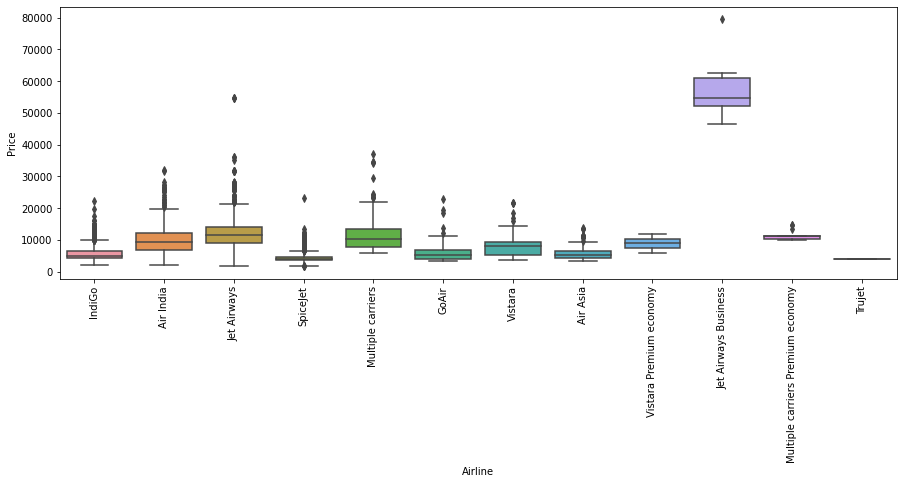

In [241]:
plt.figure(figsize=(15,5))
sns.boxplot(y='Price',x='Airline', data=data)
plt.xticks(rotation='vertical')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

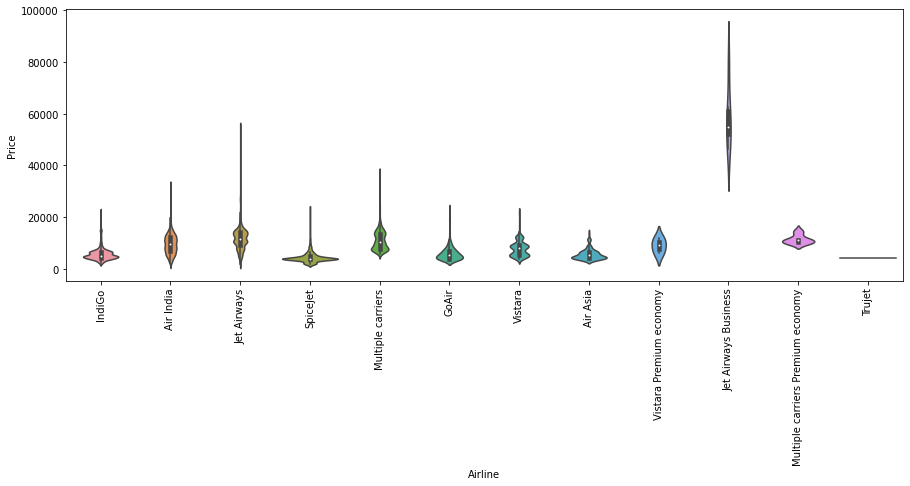

In [242]:
plt.figure(figsize=(15,5))
sns.violinplot(y='Price',x='Airline', data=data)
plt.xticks(rotation='vertical')

###Appplying one hot encoding on data
Hot encoding is feature encoding techniques.
Feature encoding techniques is used to understand the machine about categorical data

In [243]:
data.head(4)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_mins,Duration_total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,2019,5,50,13,15,7,25,445
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,2019,9,25,4,25,19,0,1140
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,2019,18,5,23,30,5,25,325


In [244]:
data['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [245]:
data['Additional_Info'].value_counts()/len(data)*100

No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: Additional_Info, dtype: float64

In [246]:
np.round(data['Additional_Info'].value_counts()/len(data)*100,2)

No info                         78.11
In-flight meal not included     18.55
No check-in baggage included     3.00
1 Long layover                   0.18
Change airports                  0.07
Business class                   0.04
No Info                          0.03
1 Short layover                  0.01
Red-eye flight                   0.01
2 Long layover                   0.01
Name: Additional_Info, dtype: float64

In [247]:
data.drop(columns=['Additional_Info','Route','Duration_total_mins','journey_year'],axis=1,inplace=True)

In [248]:
data.columns

Index(['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops', 'Price',
       'journey_day', 'journey_month', 'Dep_Time_hour', 'Dep_Time_minutes',
       'Arrival_Time_hour', 'Arrival_Time_minutes', 'Duration_hours',
       'Duration_mins'],
      dtype='object')

In [249]:
data.head(4)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25


Data Type: objects ---> means that it is a categorical data

In [250]:
#Categorical column
cat_col = [col for col in data.columns if data[col].dtype=='object']

In [251]:
#Numerical column
num_col = [col for col in data.columns if data[col].dtype!='object']

In [252]:
cat_col

['Airline', 'Source', 'Destination', 'Duration', 'Total_Stops']

In [253]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [254]:
data['Source']

0        Banglore
1         Kolkata
2           Delhi
3         Kolkata
4        Banglore
           ...   
10678     Kolkata
10679     Kolkata
10680    Banglore
10681    Banglore
10682       Delhi
Name: Source, Length: 10682, dtype: object

1. Ordinal Data --> Label Encoder
2. Nominal Data --> One hot Encoder

In [255]:
#data['Source'].apply(lambda x: 1 if x=="Banglore" else 0)

In [256]:
data['Source'].dtype

dtype('O')

In [257]:
#Applying one hot encoding using function
for category in data['Source'].unique():
  data['Source_'+category] = data['Source'].apply(lambda x: 1 if x==category else 0)

In [258]:
data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,Air India,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,Jet Airways,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0


###Applying target guided encoding on data
We perform it, when we have many categories in one column

In [259]:
data.groupby(['Airline'])['Price'].mean()

Airline
Air Asia                              5590.260188
Air India                             9612.427756
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64

In [260]:
data.groupby(['Airline'])['Price'].mean().sort_values()

Airline
Trujet                                4140.000000
SpiceJet                              4338.284841
Air Asia                              5590.260188
IndiGo                                5673.682903
GoAir                                 5861.056701
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Air India                             9612.427756
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Name: Price, dtype: float64

In [261]:
data.groupby(['Airline'])['Price'].mean().sort_values().index

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [262]:
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index

In [263]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [264]:
{key:index for index,key in enumerate(airlines,0)}


{'Air Asia': 2,
 'Air India': 7,
 'GoAir': 4,
 'IndiGo': 3,
 'Jet Airways': 10,
 'Jet Airways Business': 11,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'SpiceJet': 1,
 'Trujet': 0,
 'Vistara': 5,
 'Vistara Premium economy': 6}

In [265]:
dict1 = {key:index for index,key in enumerate(airlines,0)}

In [266]:
dict1

{'Air Asia': 2,
 'Air India': 7,
 'GoAir': 4,
 'IndiGo': 3,
 'Jet Airways': 10,
 'Jet Airways Business': 11,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'SpiceJet': 1,
 'Trujet': 0,
 'Vistara': 5,
 'Vistara Premium economy': 6}

In [267]:
data['Airline'] = data['Airline'].map(dict1)

In [268]:
data['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [269]:
data.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,Banglore,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0
2,10,Delhi,Cochin,19h 0m,2 stops,13882,6,9,9,25,4,25,19,0,0,0,1,0,0
3,3,Kolkata,Banglore,5h 25m,1 stop,6218,5,12,18,5,23,30,5,25,0,1,0,0,0
4,3,Banglore,New Delhi,4h 45m,1 stop,13302,3,1,16,50,21,35,4,45,1,0,0,0,0


In [270]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [271]:
data['Destination'].replace('New Delhi','Delhi', inplace=True)

In [272]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [273]:
data.groupby(['Destination'])['Price'].mean().sort_values().index

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [274]:
dest=data.groupby(['Destination'])['Price'].mean().sort_values().index

In [275]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [276]:
dict2 = {key:index for index,key in enumerate(dest,0)}

In [277]:
dict2

{'Banglore': 3, 'Cochin': 4, 'Delhi': 2, 'Hyderabad': 1, 'Kolkata': 0}

In [278]:
data['Destination'] = data['Destination'].map(dict2)

In [279]:
data['Destination']

0        2
1        3
2        4
3        3
4        2
        ..
10678    3
10679    3
10680    2
10681    2
10682    4
Name: Destination, Length: 10682, dtype: int64

In [280]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2 stops,7662,5,1,5,50,13,15,7,25,0,1,0,0,0


###Perform Manual Encoding

In [281]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [282]:
stops={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [283]:
stops

{'1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4, 'non-stop': 0}

In [284]:
data['Total_Stops'].map(stops)

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [285]:
data['Total_Stops']=data['Total_Stops'].map(stops)

In [286]:
data['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

###Handle Outliers in data

In [287]:
def plot(df,col):
  fig,(ax1,ax2,ax3)=plt.subplots(3,1)
  sns.distplot(df[col],ax=ax1)
  sns.boxplot(df[col],ax=ax2)
  sns.distplot(df[col],ax=ax3,kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



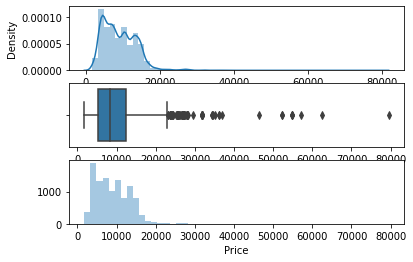

In [288]:
plot(data,'Price')

In [289]:
data['Price'] = np.where(data['Price']>=35000,data['Price'].median(),data['Price'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



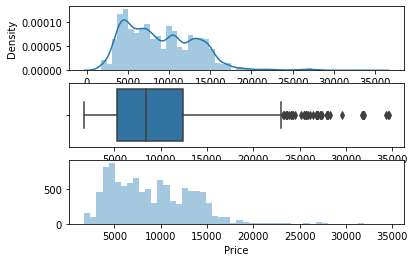

In [290]:
plot(data,'Price')

###Select best feature using Feature selections

In [291]:
data.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,2h 50m,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,Kolkata,3,7h 25m,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [292]:
data.drop(columns=['Source','Duration'],axis=1,inplace=True)

In [293]:
data.head(2)

,Airline,Destination,Total_Stops,Price,journey_day,journey_month,Dep_Time_hour,Dep_Time_minutes,Arrival_Time_hour,Arrival_Time_minutes,Duration_hours,Duration_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897.0,24,3,22,20,1,10,2,50,1,0,0,0,0
1,7,3,2,7662.0,5,1,5,50,13,15,7,25,0,1,0,0,0


In [294]:
data.dtypes
#Now our data types is only numbers, and this is needed very much for any ML algorithm

Airline                   int64
Destination               int64
Total_Stops               int64
Price                   float64
journey_day               int64
journey_month             int64
Dep_Time_hour             int64
Dep_Time_minutes          int64
Arrival_Time_hour         int64
Arrival_Time_minutes      int64
Duration_hours            int64
Duration_mins             int64
Source_Banglore           int64
Source_Kolkata            int64
Source_Delhi              int64
Source_Chennai            int64
Source_Mumbai             int64
dtype: object

Feature Selection means selecting the best feature which have good relation or which can contribute more to the target features.

In [295]:
from sklearn.feature_selection import mutual_info_regression

In [296]:
x = data.drop(['Price'],axis=1)

In [297]:
y=data['Price']

In [298]:
x.dtypes

Airline                 int64
Destination             int64
Total_Stops             int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Dep_Time_minutes        int64
Arrival_Time_hour       int64
Arrival_Time_minutes    int64
Duration_hours          int64
Duration_mins           int64
Source_Banglore         int64
Source_Kolkata          int64
Source_Delhi            int64
Source_Chennai          int64
Source_Mumbai           int64
dtype: object

In [299]:
mutual_info_regression(x,y)

array([0.9736526 , 1.01651648, 0.78959181, 0.19819893, 0.23262668,
       0.33650242, 0.25980892, 0.39379118, 0.34704444, 0.46987213,
       0.3472825 , 0.38574462, 0.45409786, 0.52041945, 0.13101289,
       0.19708888])

In [300]:
imp = pd.DataFrame(mutual_info_regression(x,y), index = x.columns)

In [301]:
imp

,0
Airline,0.979756
Destination,1.003873
Total_Stops,0.789381
journey_day,0.190733
journey_month,0.238226
Dep_Time_hour,0.337671
Dep_Time_minutes,0.259167
Arrival_Time_hour,0.407543
Arrival_Time_minutes,0.354508
Duration_hours,0.457280


In [302]:
imp.columns = ['importance']

In [303]:
imp.sort_values(by='importance',ascending=False)

,importance
Destination,1.003873
Airline,0.979756
Total_Stops,0.789381
Source_Delhi,0.522152
Source_Kolkata,0.460539
Duration_hours,0.457280
Arrival_Time_hour,0.407543
Source_Banglore,0.392967
Arrival_Time_minutes,0.354508
Duration_mins,0.343151


###Applying Machine Learning Algorithm

####Random Forest Regressor

Build ML model

In [304]:
from sklearn.model_selection import train_test_split

In [305]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [306]:
from sklearn.ensemble import RandomForestRegressor

In [307]:
ml_model = RandomForestRegressor()

In [308]:
model = ml_model.fit(x_train,y_train)

In [309]:
y_pred = model.predict(x_test)

In [310]:
y_pred

array([16752.64,  6277.56,  8907.95, ...,  3516.6 ,  6304.85,  7053.85])

In [311]:
y_pred.shape

(2671,)

In [312]:
len(x_test)

2671

Saving the model

In [313]:
import pickle

In [314]:
file = open(r'rf_random.pkl','wb') #wb-->write binary

In [315]:
pickle.dump(model,file)

How to use that saved model: Look below

In [316]:
model = open(r'rf_random.pkl','rb') #read binary

In [317]:
forest = pickle.load(model)

In [318]:
forest.predict(x_test)

array([16752.64,  6277.56,  8907.95, ...,  3516.6 ,  6304.85,  7053.85])

###Define Evaluation Matrix

In [319]:
def mape(y_true,y_pred):
  y_true,y_pred=np.array(y_true),np.array(y_pred)

  return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [320]:
mape(y_test,forest.predict(x_test))

13.259299210159433

###Automate ML Pipeline

In [321]:
def predict(ml_model):

  model = ml_model.fit(x_train,y_train)
  print('Training_Score: {}'.format(model.score(x_train,y_train)))
  y_prediction = model.predict(x_test)
  print('Predictions are: {}'.format(y_prediction))
  print('\n')

  from sklearn import metrics
  r2_score = metrics.r2_score(y_test,y_prediction)
  print('r2_score: {}'.format(r2_score))
  print('MSE : ',metrics.mean_squared_error(y_test,y_prediction))
  print('MAE : ',metrics.mean_absolute_error(y_test,y_prediction))
  print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
  print('MSE : ',mape(y_test,y_prediction))
  #sns.distplot(y_test,y_prediction)

In [322]:
predict(RandomForestRegressor())

Training_Score: 0.9522422732208505
Predictions are: [16750.33  6211.56  8808.94 ...  3494.66  6355.05  6877.95]


r2_score: 0.8059459754459053
MSE :  3777766.0634846673
MAE :  1183.4236949871233
RMSE :  1943.6476181357225
MSE :  13.245438279014401


In [323]:
from sklearn.svm import SVR

In [324]:
predict(SVR())

Training_Score: 0.011278715068053446
Predictions are: [8308.5181473  8349.85028738 8308.04849664 ... 8034.68350748 8098.99820297
 8451.71617922]


r2_score: 0.012796151958256785
MSE :  19218489.301848788
MAE :  3473.8197128499037
RMSE :  4383.889745631018
MSE :  48.49984708560175


In [325]:

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [326]:
predict(DecisionTreeRegressor())

Training_Score: 0.966591628243878
Predictions are: [16840.  6976.  8085. ...  3419.  5797.  6818.]


r2_score: 0.6980466400219357
MSE :  5878307.1296844715
MAE :  1358.2756146262325
RMSE :  2424.5220414928117
MSE :  15.017502814512577


In [327]:
predict(LinearRegression())

Training_Score: 0.5794483128817276
Predictions are: [12816.72571495  8820.27264273  8909.99897771 ...  4190.62345641
  9411.25977293  8261.70381625]


r2_score: 0.5557133671958718
MSE :  8649194.304132728
MAE :  2061.7841075952056
RMSE :  2940.9512583741894
MSE :  24.948611058775505


###Hypertuning ML model

1.Choose following method for hyperparameter tuning
    a.RandomizedSearchCV --> Fast way to Hypertune model
    b.GridSearchCV--> Slow way to hypertune my model

2.Assign hyperparameters in form of dictionary
3.Fit the model
4.Check best paramters and best score

In [328]:
from sklearn.model_selection import RandomizedSearchCV

In [329]:
reg_rf = RandomForestRegressor()

In [330]:
np.linspace(start=1000,stop=1200,num=6)

array([1000., 1040., 1080., 1120., 1160., 1200.])

In [331]:
# Number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=6)]

# Number of features to consider at every split
max_features=['auto','sqrt']

# Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=4)]

# Minimum number of samples required to split a node
min_samples_split=[5,10,15,100]

In [332]:
# Create the random grid

random_grid={
    'n_estimators':n_estimators,
    'max_features':max_features,
'max_depth':max_depth,
    'min_samples_split':min_samples_split
}

In [333]:
random_grid

{'max_depth': [5, 13, 21, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [5, 10, 15, 100],
 'n_estimators': [100, 320, 540, 760, 980, 1200]}

In [334]:
# Random search of parameters, using 3 fold cross validation

rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1)

In [335]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 13, 21, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10, 15, 100],
                                        'n_estimators': [100, 320, 540, 760,
                                                         980, 1200]},
                   verbose=2)

In [336]:
rf_random.best_params_

{'max_depth': 21,
 'max_features': 'auto',
 'min_samples_split': 10,
 'n_estimators': 320}

In [337]:
rf_random.predict(x_test)

array([16523.50346815,  6432.30996133,  8678.28878825, ...,
        3687.28993275,  6880.87184886,  7103.06754546])

In [338]:
pred2=rf_random.predict(x_test)

In [339]:
from sklearn import metrics
metrics.r2_score(y_test,pred2)

0.8275610835481912